In [ ]:
import pandas as pd
fuel_df = pd.read_csv('FuelConsumption.csv')


In [ ]:
import pandas as pd
fuel_df = pd.read_csv('FuelConsumption.csv')
fuel_df.head()


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
fuel_df.isnull().sum()


,0
MODELYEAR,0
MAKE,0
MODEL,0
VEHICLECLASS,0
ENGINESIZE,0
CYLINDERS,0
TRANSMISSION,0
FUELTYPE,0
FUELCONSUMPTION_CITY,0
FUELCONSUMPTION_HWY,0


In [ ]:
fuel_df = fuel_df.drop_duplicates()


In [ ]:
fuel_df = fuel_df.drop_duplicates()


In [ ]:
fuel_df.dtypes

,0
MODELYEAR,int64
MAKE,object
MODEL,object
VEHICLECLASS,object
ENGINESIZE,float64
CYLINDERS,int64
TRANSMISSION,object
FUELTYPE,object
FUELCONSUMPTION_CITY,float64
FUELCONSUMPTION_HWY,float64


In [ ]:
categorical_cols = fuel_df.select_dtypes(include=['object']).columns

fuel_df_encoded = pd.get_dummies(fuel_df, columns=categorical_cols)

print(fuel_df_encoded.shape)
fuel_df_encoded.head()


(1067, 752)


,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS,MAKE_ACURA,MAKE_ASTON MARTIN,...,TRANSMISSION_AV6,TRANSMISSION_AV7,TRANSMISSION_AV8,TRANSMISSION_M5,TRANSMISSION_M6,TRANSMISSION_M7,FUELTYPE_D,FUELTYPE_E,FUELTYPE_X,FUELTYPE_Z
0,2014,2.0,4,9.9,6.7,8.5,33,196,True,False,...,False,False,False,False,False,False,False,False,False,True
1,2014,2.4,4,11.2,7.7,9.6,29,221,True,False,...,False,False,False,False,True,False,False,False,False,True
2,2014,1.5,4,6.0,5.8,5.9,48,136,True,False,...,False,True,False,False,False,False,False,False,False,True
3,2014,3.5,6,12.7,9.1,11.1,25,255,True,False,...,False,False,False,False,False,False,False,False,False,True
4,2014,3.5,6,12.1,8.7,10.6,27,244,True,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
X = fuel_df_encoded.drop(columns=['CO2EMISSIONS'])
y = fuel_df_encoded['CO2EMISSIONS']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'R²: {r2:.4f}')
print(f'MSE: {mse:.4f}')



R²: 0.9743
MSE: 106.2741


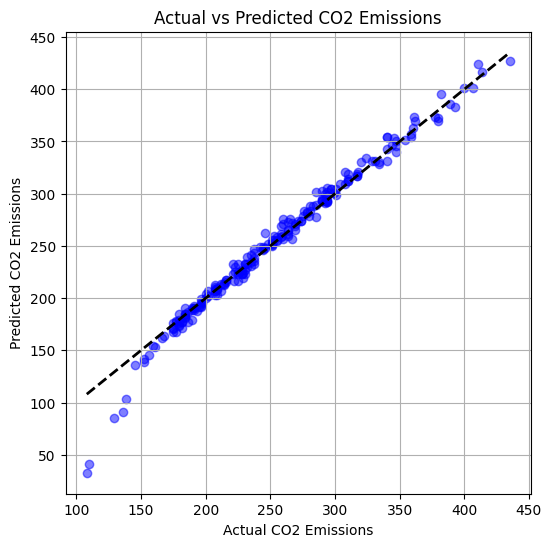

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.title('Actual vs Predicted CO2 Emissions')
plt.grid(True)
plt.show()
